Link do meu vídeo descrevendo o projeto.

https://youtu.be/LfmteGVTztU

Obter os dados:

In [ ]:
#Importando as bibliotecas que serão utilizadas:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings

#Importando os Dados:
url = "https://lib.stat.cmu.edu/datasets/boston"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(url, sep='\s+', skiprows=22, names=names)

#Definindo a semente para reprodutibilidade - Para garantir estabilidade e ser mais fácil reproduzir experimento:
seed = 42
np.random.seed(seed)

#  sep='\s+': Indica que os valores são separados por um ou mais espaços em branco.
#  skiprows=22: Pula as primeiras 22 linhas, que contêm a descrição do conjunto de dados.
#  names=names: Atribui os nomes das colunas.

Vamos visualizar as primeiras linhas do dataframe:

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,NaN,NaN,NaN
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,NaN,NaN,NaN
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,NaN,NaN,NaN


 Coletar uma amostra contendo 10 instâncias para visualizar os dados:

In [ ]:
data.sample(n = 10, random_state = seed)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
631,396.42000,11.50,16.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
634,0.24522,0.00,9.90,0.0,0.544,5.782,71.7,4.0317,4.0,304.0,18.4,NaN,NaN,NaN
963,393.07000,7.74,23.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
625,396.30000,11.72,19.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,394.12000,4.82,37.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720,4.54192,0.00,18.10,0.0,0.770,6.398,88.0,2.5182,24.0,666.0,20.2,NaN,NaN,NaN
750,19.60910,0.00,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,NaN,NaN,NaN
533,384.07000,14.79,30.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519,391.93000,6.90,30.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,0.06417,0.00,5.96,0.0,0.499,5.933,68.2,3.3603,5.0,279.0,19.2,NaN,NaN,NaN


 Importar módulo básicos do **matplotlib** para plotar figuras:

In [ ]:
# Para plotar figuras
#Gráficos matplotlib incluídos no notebook, ao lado do código
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignorar warnings desnecessários (ver SciPy issue #5998) -É comum que alarmes sejam disparados quando há algum erro interno ao rodar os códigos.
# Em geral é importante manter eles ligados pois podem nos ajudar a identificar possíveis erros no código.Por hora vamos desligar alguns warnings desnecessários relacionados ao 'internal gelsd'.
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Função para excluir colunas com todos os valores nulos
def remove_empty_columns(df):
    """Remove colunas onde todos os valores são NaN."""
    cols_to_remove = df.columns[df.isna().all()]
    print(f"Removendo colunas sem dados: {list(cols_to_remove)}")
    return df.drop(columns=cols_to_remove)

# Remover colunas com todos os valores nulos
data = remove_empty_columns(data)

Removendo colunas sem dados: ['B', 'LSTAT', 'MEDV']


Informações sobre as variáveis do problema:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     1012 non-null   float64
 1   ZN       1012 non-null   float64
 2   INDUS    1012 non-null   float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
dtypes: float64(11)
memory usage: 87.1 KB


 É importante também saber como esse dataset foi construído. Este conjunto de dados contém informações coletadas pelo US Census Service sobre moradia na área de Boston, Massachusetts. Foi obtido do arquivo StatLib ( http://lib.stat.cmu.edu/datasets/boston ), e tem sido usado extensivamente em toda a literatura para algoritmos de benchmark. No entanto, essas comparações foram feitas principalmente fora do Delve e, portanto, são um tanto suspeitas. O conjunto de dados é pequeno em tamanho, com apenas 506 casos. As características (features) são as seguintes:

* CRIM: taxa de criminalidade per capita por cidade
* ZN: proporção de terrenos residenciais zoneados para lotes acima de 25.000 sq.ft.
* INDUS: proporção de acres de negócio não-varejista por cidade
* CHAS: variável dummy Charles River (1 se o trecho limita o rio; 0 caso contrário)
* NOX: concentração de óxidos nítricos (partes por 10 milhões)
* RM: número médio de cômodos por habitação
* AGE: proporção de unidades ocupadas pelo proprietário construídas antes de 1940
* DIS: distâncias ponderadas para cinco centros de emprego de Boston
* RAD: índice de acessibilidade às rodovias radiais
* TAX: taxa de imposto sobre a propriedade de valor total por $10,000
* PTRATIO: razão aluno-professor por cidade
* B: 1000(Bk - 0.63)^2 onde Bk é a proporção de pessoas de descendência afro-americana por cidade
* LSTAT: porcentagem de status inferior da população
* MEDV: valor mediano das casas ocupadas pelo proprietário em $1000

Extrair algumas medidas resumo do nosso conjunto de dados:

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
count,1012.000000,1012.000000,1012.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,180.143778,12.008350,16.834792,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
std,188.132839,17.250728,9.912616,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000
25%,0.257830,0.000000,8.375000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000
50%,24.021000,7.240000,18.100000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000
75%,391.435000,16.780000,21.890000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000
max,396.900000,100.000000,50.000000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000


Histogramas também são úteis para compreender o problema:

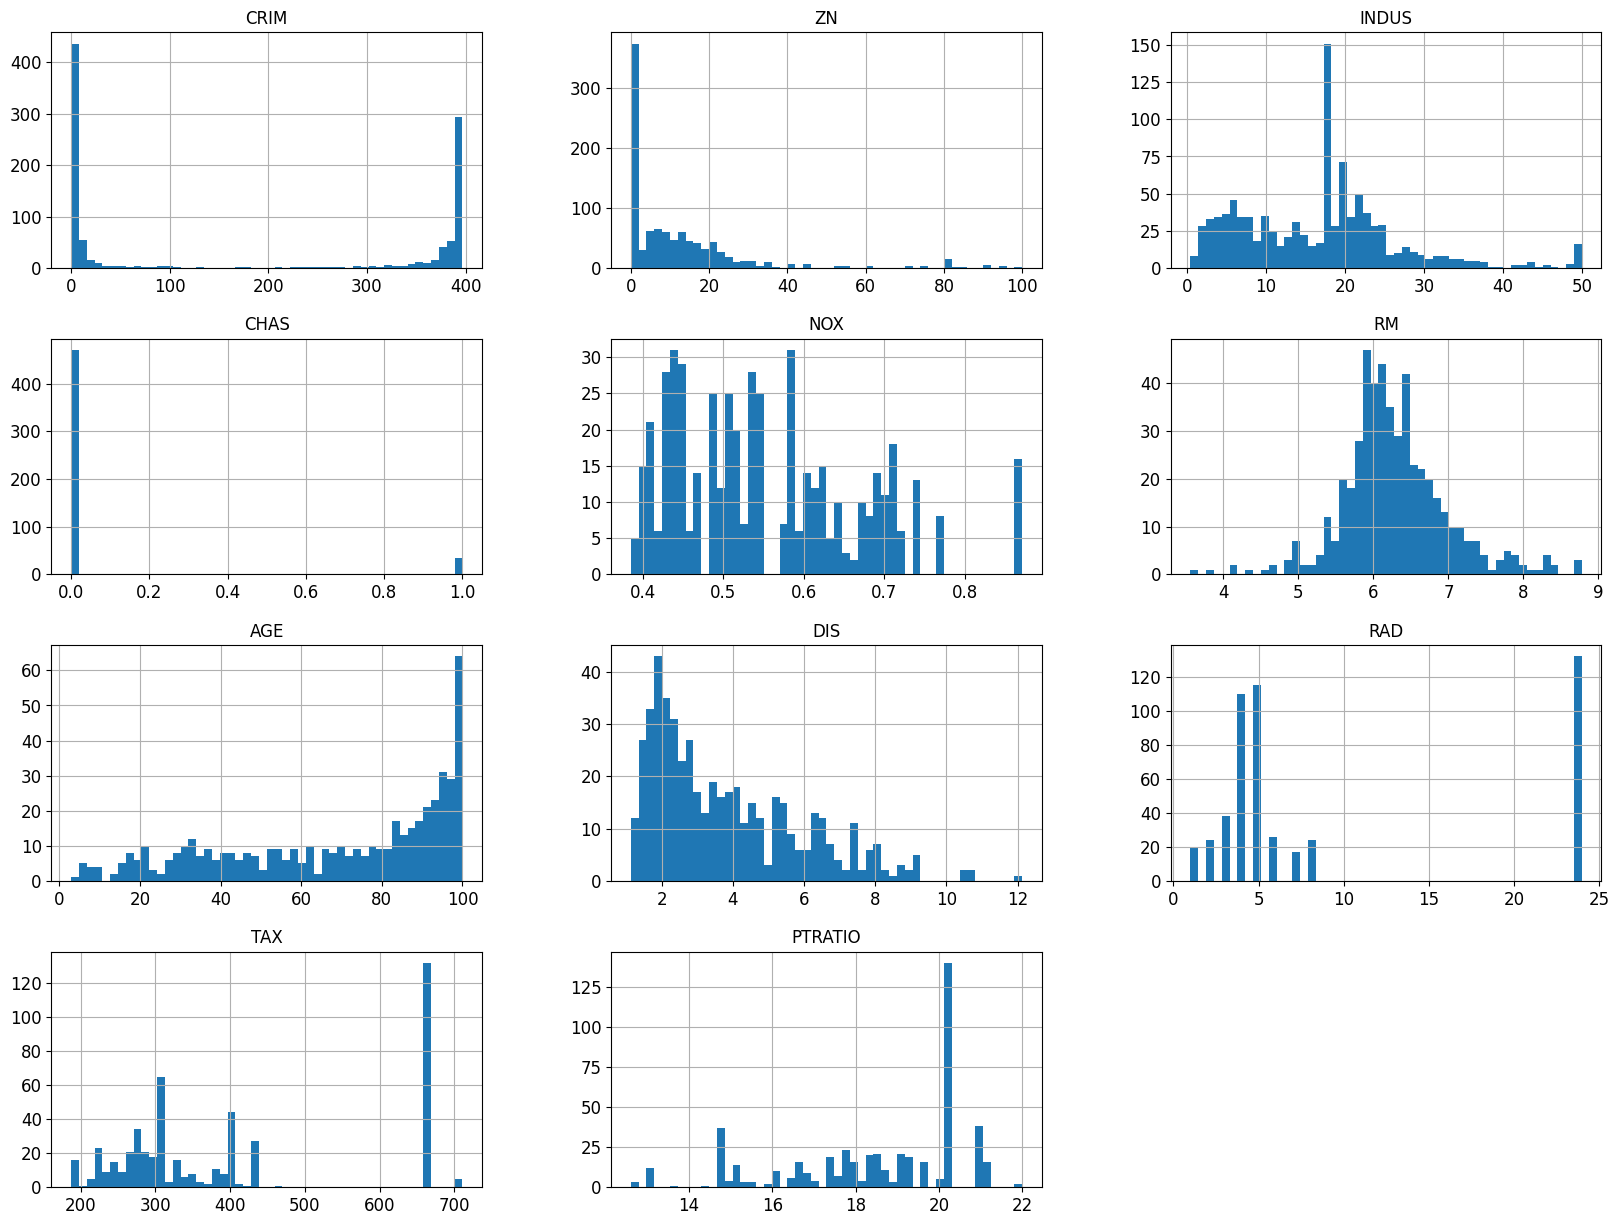

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Separando o conjunto de dados:

A função train_test_split da biblioteca scikit-learn é amplamente utilizada para dividir um conjunto de dados em dois subconjuntos: um para treinamento e outro para teste. Isso é essencial para a construção e avaliação de modelos de machine learning.

```
- data: Conjunto de dados completo que será dividido.
- test_size=0.2: Define que 20% dos dados serão usados para o conjunto de teste e 80% para o conjunto de treino.
- random_state=seed: Garante que a divisão seja reprodutível (ou seja, sempre que o código for executado com o mesmo valor de seed, a divisão será a mesma).  

```
O resultado é:
```
- train_set: Subconjunto usado para treinar o modelo.
- test_set: Subconjunto usado para testar o desempenho do modelo depois que ele foi treinado.

```

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir o dataset em treino e teste
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)


Importância da Separação acima:

Dividir os dados em treino e teste é fundamental para evitar **overfitting** e garantir uma avaliação justa do modelo. Veja por quê:

**Conjunto de treino:** O modelo aprende padrões e ajusta seus parâmetros com base nesses dados.
**Conjunto de teste:** É usado para avaliar a capacidade do modelo de generalizar para dados que ele nunca viu antes.

**Se não houvesse uma divisão, seria difícil saber se o modelo realmente aprendeu a generalizar ou apenas decorou as respostas (overfitting).**

Resumindo, essa função é uma maneira simples e eficiente de dividir os dados em duas partes, garantindo uma avaliação justa do modelo e evitando sobreajuste. O uso de um teste com dados “novos” é essencial para entender a capacidade de generalização do modelo, e o parâmetro random_state ajuda a garantir que os experimentos sejam consistentes.



---

Para evitar data leakage, primeiro separamos os dados em treino e teste usando train_test_split. Em seguida, aplicamos transformações (como normalização) ajustando o escalador apenas no conjunto de treino . Para o teste, aplicando a mesma escala sem recalcular estatísticas. Isso garante que o modelo só veja informações do treino, evitando que dados do teste vazem, o que simula melhor seu desempenho real e previne snooping e overfitting.


Visualização da estrutura de dados:

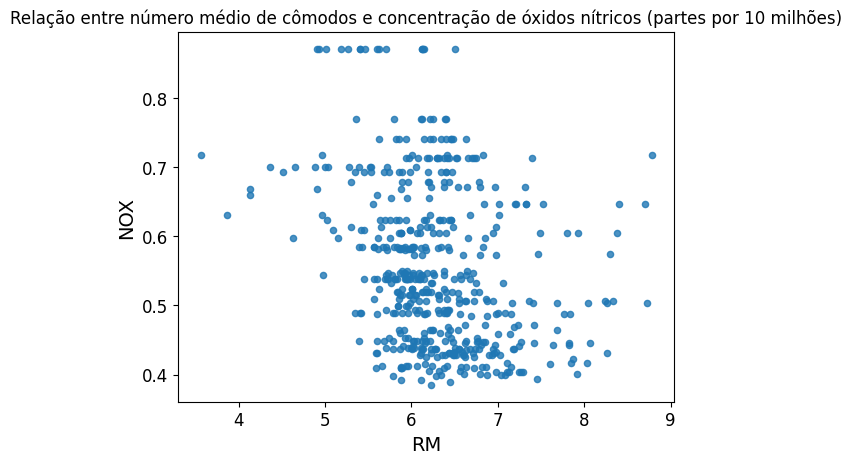

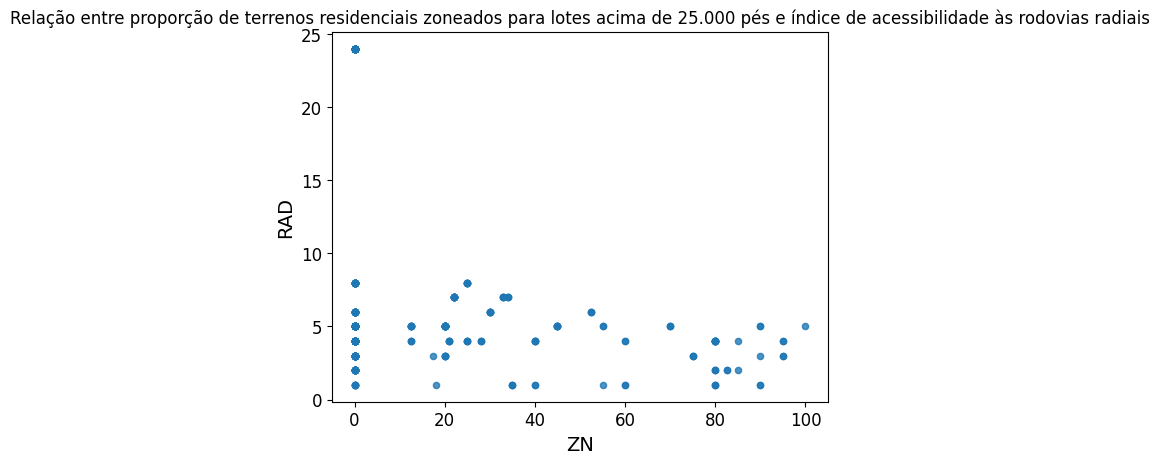

In [ ]:
data.plot(kind="scatter", x="RM", y="NOX", alpha=0.8)
plt.title("Relação entre número médio de cômodos e concentração de óxidos nítricos (partes por 10 milhões)")
plt.show()

data.plot(kind="scatter", x="ZN", y="RAD", alpha=0.8)
plt.title("Relação entre proporção de terrenos residenciais zoneados para lotes acima de 25.000 pés e índice de acessibilidade às rodovias radiais")
plt.show()

Correlações entre as Variáveis:

In [ ]:
corr_matrix = data.corr()
corr_matrix["NOX"].sort_values(ascending=False)

,NOX
NOX,1.000000
INDUS,0.763651
AGE,0.731470
TAX,0.668023
RAD,0.611441
CRIM,0.420972
PTRATIO,0.188933
CHAS,0.091203
RM,-0.302188
ZN,-0.516604


Preparar os dados para os algoritmos de Machine Learning:

In [ ]:
corr_matrix = data.corr()
print(corr_matrix["NOX"].sort_values(ascending=False))

NOX        1.000000
INDUS      0.763651
AGE        0.731470
TAX        0.668023
RAD        0.611441
CRIM       0.420972
PTRATIO    0.188933
CHAS       0.091203
RM        -0.302188
ZN        -0.516604
DIS       -0.769230
Name: NOX, dtype: float64


Tratar os dados faltantes (se houver) e normalizar as features:

In [ ]:
# Separando rótulos e atributos do conjunto de treino
X_train = train_set.drop("NOX", axis=1)
y_train = train_set["NOX"].copy()

# Pré-processamento: imputação e padronização
imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()

X_train_num = X_train.select_dtypes(include=[np.number])
X_train_imputed = imputer.fit_transform(X_train_num)
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Conjunto de dados preparado
X_train_prepared = pd.DataFrame(X_train_scaled, columns=X_train_num.columns)

Selecionar e treinar um modelo - Regressão Linear:

---
Escolha da Métrica Mean Absolute Error: O RMSE é adequado para o projeto de Boston Housing porque penaliza erros grandes mais severamente, o que é crucial na previsão de preços imobiliários. Além disso, como está na mesma unidade do alvo (preço), facilita a interpretação dos resultados. Ele também destaca diferenças de desempenho entre modelos como regressão linear, árvore de decisão e random forest, alinhando-se com o objetivo de garantir alta precisão nas previsões.

In [ ]:
# Realinhar índices para garantir consistência
y_train = y_train.reindex(X_train_prepared.index)

# Verificar valores ausentes em y_train
print(f"Valores ausentes em y_train: {y_train.isna().sum()}")

# Remover amostras com rótulos NaN
mask = y_train.notna()
X_train_prepared_clean = X_train_prepared.loc[mask]
y_train_clean = y_train.loc[mask] #Uso de .loc: Selecionar apenas as linhas correspondentes aos índices válidos.

print(f"Número de amostras após remoção de NaN: {len(y_train_clean)}")

# Treinamento do modelo de Regressão Linear
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared_clean, y_train_clean)

# Previsões e cálculo do RMSE
lin_predictions = lin_reg.predict(X_train_prepared_clean)
lin_rmse = np.sqrt(mean_squared_error(y_train_clean, lin_predictions))
print(f"RMSE para Regressão Linear: {lin_rmse}")


Valores ausentes em y_train: 494
Número de amostras após remoção de NaN: 315
RMSE para Regressão Linear: 0.1076462148120177


Selecionar e treinar um modelo - Árvore de Decisão:

In [21]:
from sklearn.tree import DecisionTreeRegressor

# Realinhar índices para garantir consistência
y_train = y_train.reindex(X_train_prepared.index)

# Verificar valores ausentes em y_train
print(f"Valores ausentes em y_train: {y_train.isna().sum()}")

# Remover amostras com rótulos NaN
mask = y_train.notna()
X_train_prepared_clean = X_train_prepared.loc[mask]
y_train_clean = y_train.loc[mask] #Uso de .loc: Selecionar apenas as linhas correspondentes aos índices válidos.

print(f"Número de amostras após remoção de NaN: {len(y_train_clean)}")

tree_reg = DecisionTreeRegressor(random_state=seed)
tree_reg.fit(X_train_prepared_clean, y_train_clean)

tree_predictions = tree_reg.predict(X_train_prepared_clean)
tree_rmse = np.sqrt(mean_squared_error(y_train_clean, tree_predictions))
print(f"RMSE para Árvore de Decisão: {tree_rmse}")


Valores ausentes em y_train: 494
Número de amostras após remoção de NaN: 315
RMSE para Árvore de Decisão: 0.0


Ajustando e selecionando modelo - Uso do Grid Search para buscar melhores parâmetros para a nossa Random Forest:

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Realinhar índices para garantir consistência
y_train = y_train.reindex(X_train_prepared.index)

# Verificar valores ausentes em y_train
print(f"Valores ausentes em y_train: {y_train.isna().sum()}")

# Remover amostras com rótulos NaN
mask = y_train.notna()
X_train_prepared_clean = X_train_prepared.loc[mask]
y_train_clean = y_train.loc[mask] #Uso de .loc: Selecionar apenas as linhas correspondentes aos índices válidos.

print(f"Número de amostras após remoção de NaN: {len(y_train_clean)}")

# Definição dos parâmetros a serem testados
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=seed)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_prepared_clean, y_train_clean)

print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor estimador:", grid_search.best_estimator_)

Valores ausentes em y_train: 494
Número de amostras após remoção de NaN: 315
Melhores parâmetros: {'max_features': 6, 'n_estimators': 30}
Melhor estimador: RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)


Random Forest:

In [23]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=seed)
forest_reg.fit(X_train_prepared_clean, y_train_clean)

forest_predictions = forest_reg.predict(X_train_prepared_clean)
forest_rmse = np.sqrt(mean_squared_error(y_train_clean, forest_predictions))
print(f"RMSE para Random Forest: {forest_rmse}")

RMSE para Random Forest: 0.04536282229546043


Importância das features:

In [24]:
# Obter as importâncias das features do melhor estimador
feature_importances = grid_search.best_estimator_.feature_importances_

# Garantir que as colunas correspondam ao DataFrame preparado
feature_names = X_train_prepared_clean.columns  # Usando as colunas dos dados de treino limpos

# Ordenar e exibir as importâncias
sorted_features = sorted(zip(feature_importances, feature_names), reverse=True)

# Exibir o resultado formatado
for importance, name in sorted_features:
    print(f"{name}: {importance:.4f}")

INDUS: 0.2482
CRIM: 0.2454
ZN: 0.2041
RM: 0.0931
DIS: 0.0586
AGE: 0.0508
TAX: 0.0470
PTRATIO: 0.0285
RAD: 0.0180
CHAS: 0.0063


Modelo e teste final:

In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Obter o melhor modelo da busca em grade
final_model = grid_search.best_estimator_

# Reordenar as colunas para garantir consistência
X_test = test_set.drop("NOX", axis=1)[X_train_prepared.columns]
y_test = test_set["NOX"].copy()

# Verificar e transformar os dados de teste
X_test_imputed = imputer.transform(X_test)
X_test_prepared = scaler.transform(X_test_imputed)

# Verificar valores ausentes após preparação
print(f"Valores ausentes após preparação: {np.isnan(X_test_prepared).sum()}")

# Verificar e remover amostras com NaN em y_test
mask = y_test.notna()
X_test_prepared = X_test_prepared[mask]
y_test = y_test[mask]

# Fazer previsões
final_predictions = final_model.predict(X_test_prepared)

# Calcular MSE e RMSE
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

# Exibir o RMSE
print(f"RMSE final para a métrica NOX: {final_rmse:.4f}")

Valores ausentes após preparação: 0
RMSE final para a métrica NOX: 0.1549


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Avaliação dos modelos acima usando Validação Cruzada:

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Função para exibir os scores de RMSE
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Média: {scores.mean():.4f}")
    print(f"Desvio Padrão: {scores.std():.4f}")

# Verificar e alinhar os índices entre X_train_prepared e y_train
y_train = y_train.reindex(X_train_prepared.index)

# Remover amostras com rótulos NaN
mask = y_train.notna()
X_train_prepared_clean = X_train_prepared.loc[mask]
y_train_clean = y_train.loc[mask]

# Definir uma semente para reprodutibilidade
seed = 42

# Treinar e avaliar o modelo de Regressão Linear
lin_reg = LinearRegression()
scores_lin = cross_val_score(lin_reg, X_train_prepared_clean, y_train_clean,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores_lin)
print("Regressão Linear:")
display_scores(lin_rmse_scores)

# Treinar e avaliar o modelo de Árvore de Decisão
tree_reg = DecisionTreeRegressor(random_state=seed)
scores_tree = cross_val_score(tree_reg, X_train_prepared_clean, y_train_clean,
                              scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores_tree)
print("\nÁrvore de Decisão:")
display_scores(tree_rmse_scores)

# Treinar e avaliar o modelo de Floresta Aleatória
forest_reg = RandomForestRegressor(n_estimators=100, random_state=seed)
scores_forest = cross_val_score(forest_reg, X_train_prepared_clean, y_train_clean,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores_forest)
print("\nFloresta Aleatória:")
display_scores(forest_rmse_scores)

Regressão Linear:
Scores: [0.03867389 0.10894212 0.05640669 0.21850652 0.0892617  0.06006771
 0.10893979 0.08332829 0.11741043 0.18489234]
Média: 0.1066
Desvio Padrão: 0.0538

Árvore de Decisão:
Scores: [0.09787269 0.1830099  0.13089984 0.24718225 0.17361474 0.13081642
 0.18109925 0.11801944 0.13349636 0.20656411]
Média: 0.1603
Desvio Padrão: 0.0435

Floresta Aleatória:
Scores: [0.05905092 0.11862509 0.07540323 0.21690933 0.1095324  0.0612408
 0.12849178 0.09476498 0.11991678 0.18103233]
Média: 0.1165
Desvio Padrão: 0.0479


Este notebook apresenta uma análise completa do conjunto de dados Boston Housing,
seguindo as etapas principais de um projeto de machine learning. O modelo final é
uma Random Forest otimizada através de Grid Search, que pode ser utilizada para pre-
ver os preços das casas em Boston com base nas características fornecidas.